In [1]:
# %pip install -r requirements.txt

In [2]:
import math
import numpy as np
import random
import os
import tarfile
from six.moves import urllib
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Lets Define $l_1$ and $l_2$ Norm. \
$$\begin{equation} 
l_1(\textbf{v}) = \sum_{i=1}^N |v_i|
\end{equation} 
$$
$$
l_2(\textbf{v}) = \sqrt{\sum_{i=1}^N |v_i|^2}
$$
Generally $l_k$ norm of a vector is defined by,
$$
l_k(v) = (|v_1|^k + |v_2|^k + ..... + | v_k | ^k)^{\frac{1}{k}}
$$

In [3]:
def l1Norm(x):
    return sum(x)
    
def l2Norm(x):
    n = len(x)
    total_sum = sum(list(map(lambda _list:_list * _list, x)))
    return math.sqrt(total_sum)

def lkNorm(vector,k):
    total_sum = sum(list(map(lambda _list: abs(_list) ** k,vector)))
    return total_sum ** (1/k)
    

In [4]:
vector = random.sample(range(1,10),3)
print(vector)
print("l1",l1Norm(vector))
print("l2",l2Norm(vector))
print("lK",lkNorm(vector,3))

[8, 5, 1]
l1 14
l2 9.486832980505138
lK 8.608752581806055


In [5]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [6]:
#fetch the data
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

#load the data
fetch_housing_data()
def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path,"housing.csv")
    return pd.read_csv(csv_path)

In [7]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
#Lets get a info of this dataset
'''
info will provide the number of columns, their names, counts, null values and datatype

'''
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
#we have given an object. Lets see its info
print(housing.ocean_proximity.value_counts())

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


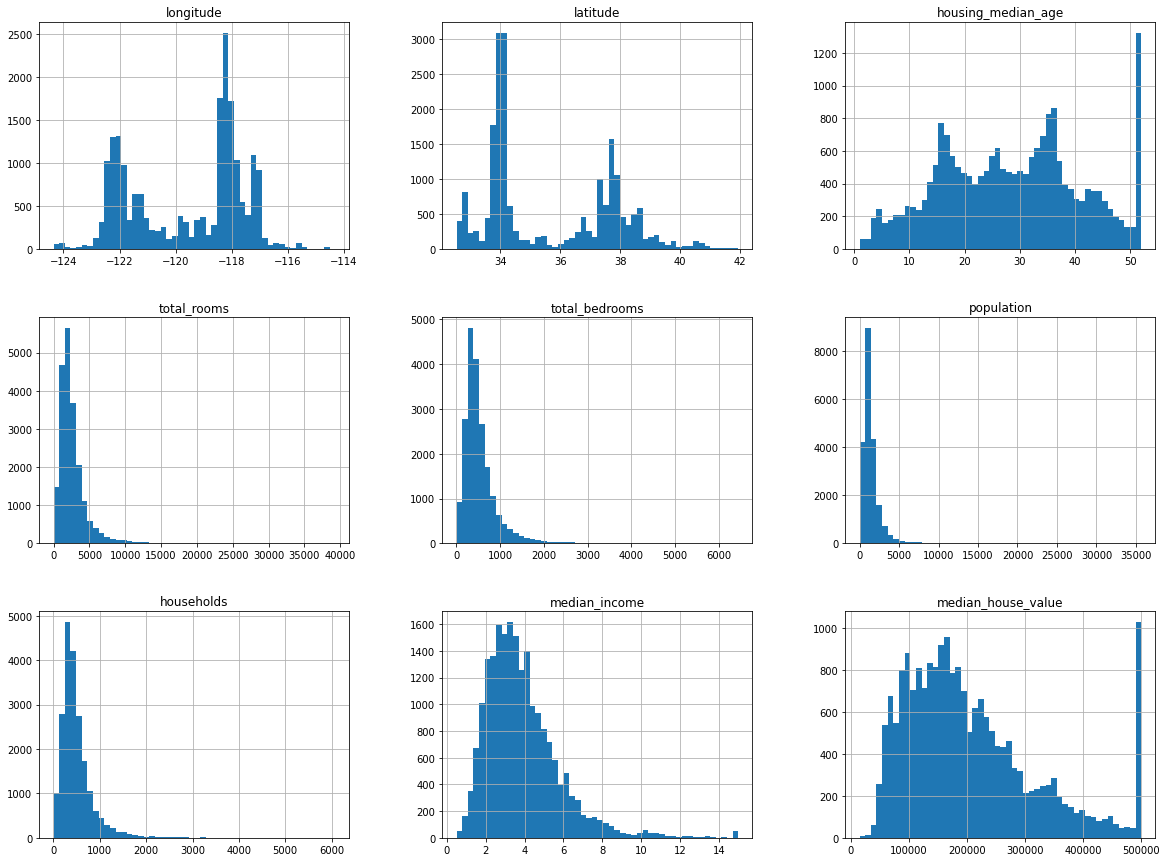

In [10]:
#Lets plot this data
%matplotlib inline
housing.hist(bins = 50, figsize=(20,15))
plt.show()

##### Creating test Set

In [11]:
# train_set,test_set = train_test_split(housing,test_size=0.3,random_state=42)


In [12]:
#here np.inf is used to create a class from 6 - infinity
housing["income_cat"] = pd.cut(housing.median_income,[0.,1.5,3.0,4.5,6.,np.inf],
                               labels=[1,2,3,4,5])

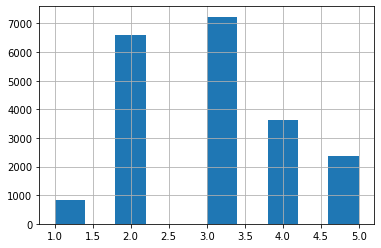

<AxesSubplot:>

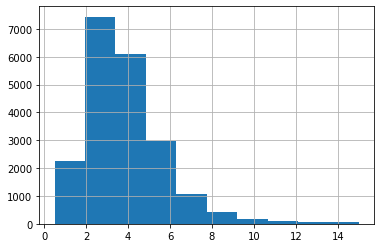

In [13]:
housing.income_cat.hist()
plt.show()
housing.median_income.hist()


In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.3,random_state=42)
for train_inx, test_idx in split.split(housing,housing.income_cat):
    print(train_inx,test_idx)
    strat_train_set = housing.loc[train_inx]
    strat_test_set = housing.loc[test_idx]

[ 8577  5960  4753 ... 15591  5676  7730] [17966 17037  7313 ...  8136 15200 13586]


In [15]:
strat_test_set.income_cat.value_counts()

3    2171
2    1974
4    1092
5     708
1     247
Name: income_cat, dtype: int64

In [16]:
strat_train_set.income_cat.value_counts()

3    5065
2    4607
4    2547
5    1654
1     575
Name: income_cat, dtype: int64

In [17]:
housing.income_cat.value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

In [18]:
strat_train_set.drop("income_cat",axis = 1,inplace=True)
strat_test_set.drop("income_cat",axis = 1,inplace=True)
#Important to note here is that the axis = 0, deletes the row and, axis = 1 deletes the column.

In [19]:
'''
So far we downloaded the data. Looked into its histogram, figured one attribute might be the
most important one. So, categorized it, using pandas cut method. Once we have categorized,
we did stratified sampling and get the train and test dataset.
'''

'\nSo far we downloaded the data. Looked into its histogram, figured one attribute might be the\nmost important one. So, categorized it, using pandas cut method. Once we have categorized,\nwe did stratified sampling and get the train and test dataset.\n'

### Visualize the data

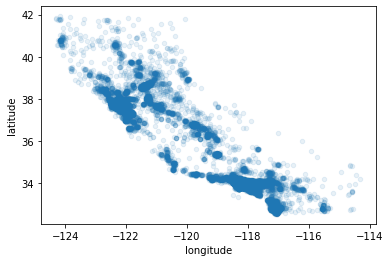

In [20]:
'''
It is very important to left the test set untouched and training set to be copied. we might 
chage it during visualization.
'''
housing = strat_train_set.copy()
#Scatter plot to view two attributes
housing.plot(kind="scatter",x = 'longitude',y = 'latitude',alpha = 0.1)
plt.show()

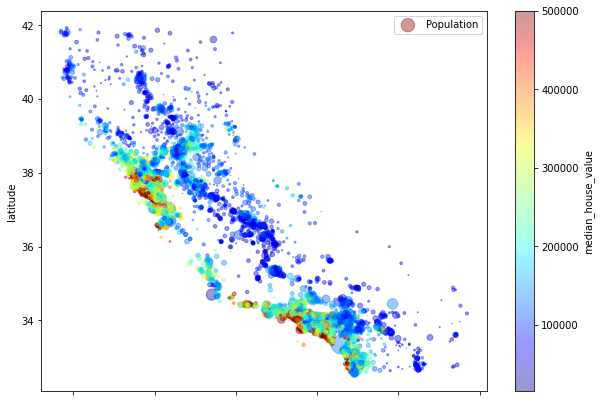

In [21]:
housing.plot(kind = "scatter", x = "longitude", y = "latitude",alpha = 0.4,
            s = housing.population/100,label = "Population",
            figsize = (10,7), c = 'median_house_value',cmap = plt.get_cmap("jet"),
            colorbar = True,)
plt.legend()
plt.show()

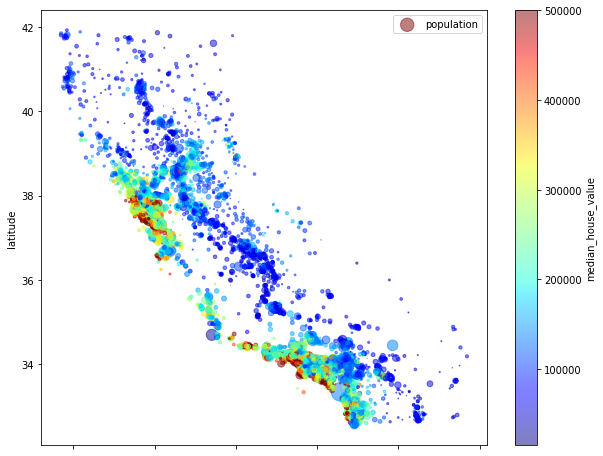

In [22]:
#lets try again to generate a population density in geographical area, based on popn 
#and colored by median_house value
housing.plot(kind = "scatter",x = 'longitude', y = "latitude",alpha = 0.5,
            s = housing.population/100,c = "median_house_value",
            label = "population",colorbar = True,cmap = plt.get_cmap("jet"),figsize = (10,8) )
plt.legend()
plt.show()

In [23]:
#Calculating the correlation matrix
corr_mat = housing.corr()


In [24]:
corr_mat.median_house_value.sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687873
total_rooms           0.136801
housing_median_age    0.116305
households            0.066788
total_bedrooms        0.049523
population           -0.024592
longitude            -0.052345
latitude             -0.137864
Name: median_house_value, dtype: float64

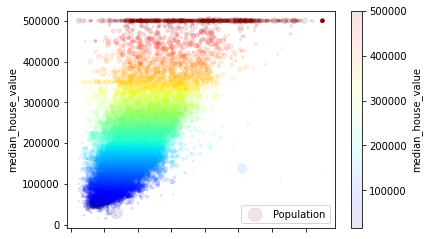

In [25]:
housing.plot(kind = 'scatter', x= "median_income", y = "median_house_value",
            alpha = 0.1, s = housing.population/100,
            c = 'median_house_value',
            cmap = plt.get_cmap("jet"),colorbar = True,label = "Population")
plt.legend()
plt.show()

In [26]:
#Lets create a data for training
# We will drop :Median_house_value" from the dataset and and get it as a target
housing = strat_train_set.drop("median_house_value",axis=1)
housing_labels = strat_train_set.median_house_value.copy()

#Working with missing fetures
#Lets look again
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14448 entries, 8577 to 7730
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14308 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.1+ MB


In [27]:
#Lets Calculate median and fill that value
median = housing.total_bedrooms.median()
housing.total_bedrooms.fillna(median,inplace=True)
housing.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 14448 entries, 8577 to 7730
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14448 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.1+ MB


In [28]:
#lets compute using sklearn
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
print(housing.dtypes)
#Lets create the dataframe without the object datatype

housing_num = housing.drop("ocean_proximity",axis = 1)
imputer.fit(housing_num)
imputer.statistics_
#Lets replace missing values with the median
X = imputer.transform(housing_num) #this is numpy array

#Changing it to pandas
housing_tr = pd.DataFrame(X,columns=housing_num.columns, index= housing_num.index)


longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
ocean_proximity        object
dtype: object


In [32]:
# The above methods helped us to deal with the missing numerical points. 
# Here we will look how to deal with text and categorical values

housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
8577,<1H OCEAN
5960,INLAND
4753,<1H OCEAN
15423,<1H OCEAN
9788,INLAND
16873,NEAR OCEAN
8106,NEAR OCEAN
14913,NEAR OCEAN
14427,NEAR OCEAN
3870,<1H OCEAN


In [34]:
print(housing_cat.value_counts())

#This is a text class. But We like to deal with the numbers.
# Lets convert it to numbers
'''
We don't have to worry about the number of classes in categorical features. Sklearn takes care of it
'''
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded
ordinal_encoder.categories_


ocean_proximity
<1H OCEAN          6381
INLAND             4578
NEAR OCEAN         1829
NEAR BAY           1658
ISLAND                2
dtype: int64


[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [41]:
'''
Although we have encoded cagtegorical variables to numberical, there may be some bais while training.
Lets create one-hot encoding. 
'''
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()
housing_cat_1hot = one_hot_encoder.fit_transform(housing_cat)
housing_cat_1hot_df = pd.DataFrame(housing_cat_1hot,columns=housing_cat.columns,index=housing_cat.index)
housing_cat_1hot_df

,ocean_proximity
8577,"(0, 0)\t1.0"
5960,"(0, 1)\t1.0"
4753,"(0, 0)\t1.0"
15423,"(0, 0)\t1.0"
9788,"(0, 1)\t1.0"
...,...
13602,"(0, 1)\t1.0"
14693,"(0, 4)\t1.0"
15591,"(0, 1)\t1.0"
5676,"(0, 4)\t1.0"


In [43]:
#Lets visualize it in matrix
one_hot_mat = housing_cat_1hot.toarray()
one_hot_mat

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.]])

In [45]:
one_hot_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

# Feature Scaling